(0.0, 0.03, -223.0, 223.0)

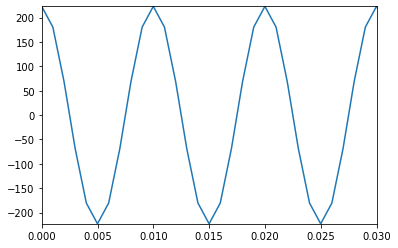

In [1]:
## 1 - Sinusoide com f = 100Hz, Fs = 1000hz de duração 2segundos

import numpy as np
import matplotlib.pyplot as plt

Fs = 1000 #frequencia de amostragem usada apenas para AMOSTRAR o grafico; é a freq que queremos ou dada pelo enunciado
Ts = 1/Fs
f = 100
t = np.arange(0,2,Ts)
x = 223 * np.cos(2*np.pi*f*t)
plt.plot(t,x)
plt.axis([0,0.03,-223,223])

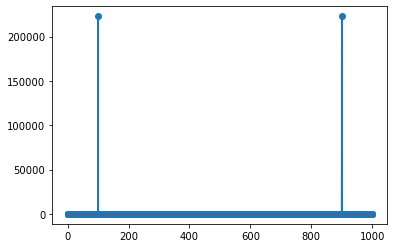

In [2]:
## 2 - frequencia - usar np.fft ; dar plot do espectro de amplitude

X = np.fft.fft(x)
N = len(x)

freq = np.arange(N) * Fs/N
plt.stem(freq, np.abs(X))
plt.plot(freq, np.abs(X))

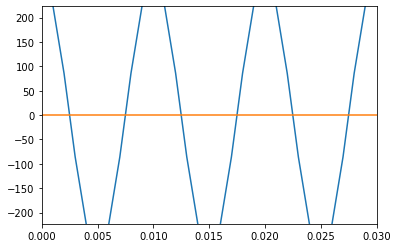

In [3]:
## 3 - A mesma coisa que o primeiro exercicio mas com duas sinusoides diferentes

Fs = 1000 #frequencia de amostragem usada apenas para AMOSTRAR o grafico; é a freq que queremos ou dada pelo enunciado
Ts = 1/Fs
f = 100
t = np.arange(0,2,Ts)
x = 223 * np.cos(2*np.pi*f*t) + 55 * np.cos(2*np.pi*f*t)
plt.plot(t,x)
plt.axis([0,0.03,-223,223])


X = np.fft.fft(x)
M = len(x)

freq = np.arange(M) * Fs/M
plt.plot(freq, np.abs(X))

In [4]:
## Representação da escala musical

Fs = 8000
Ts = 1/Ts

#do = np.power(2,(40-49)/12) * 440
do = (2 ** ((40-49)/12)) * 440
re = np.power(2,(42-49)/12) * 440
mi = np.power(2,(44-49)/12) * 440
fa = np.power(2,(45-49)/12) * 440
sol = np.power(2,(47-49)/12) * 440
la = np.power(2,(49-49)/12) * 440
si = np.power(2,(51-49)/12) * 440
do2 = np.power(2,(52-49)/12) * 440


t = np.arange(0,1,Ts)

f_do = np.cos(2*np.pi*do*t)

from IPython.display import  Audio, display
display(Audio(data = f_do, rate = Fs))

In [5]:
Fs = 8000
Ts = 1/Fs
t = np.arange(0,1,Ts)

teclas = [40,42,44,45,47,49,51,52]

#for loop que gera widgets com as notas em separado
for tecla in teclas:
    freq = (2**((tecla - 49)/12)) * 440
    nota = np.cos(2 * np.pi * freq * t)
    display(Audio(data = nota, rate = Fs))

(200.0, 600.0, 0.0, 0.07)

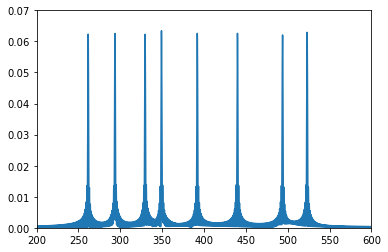

In [6]:
#Concatenação de todas as frequencias num so ficheiro audio

musica = np.zeros(len(teclas) * Fs) #array vazio de zeros, de comprimento do numero de notas * o tempo que queremos ouvir cada nota

for i in range(len(teclas)):
    freq = (2**((teclas[i] - 49)/12)) * 440
    nota = np.cos(2 * np.pi * freq * t)
    musica[i*Fs:(i+1)*Fs] = nota  #o array vai da primeira frequencia ate a ultima

display(Audio(data = musica, rate = Fs))


#amostragem do espectro de amplitude
X = np.fft.fft(musica)
N = len(X)
freq = np.arange(N) * Fs/N
plt.plot(freq, np.abs(X)/N)
plt.axis([200,600,0,0.07])

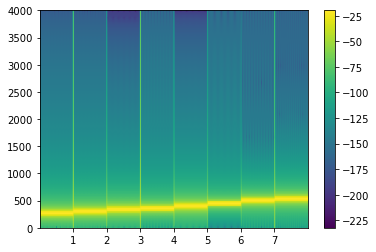

In [7]:
#espectrograma

plt.specgram(musica, Fs = Fs)
plt.colorbar()